##### Task 1 (7 Points)

In [2]:
"""
    topic: harmonic progression

    a) 
    calculate the partial sum
    a_n = sum_i_n ( 1 / i ) 
        for n = 2^k with k in  {5, 6, ..., 27}
        and i = 1, 2, ..., n
    
    transform the value with numpy.single after every operation

    b) 
    similar to a), but
        for i = n, n - 1, ..., 1

    c)
    repeat a) and b) without the transformation with numpy.single

    plot the absolute error:
        - pyplot.loglog

    discuss your findings

"""
import numpy as np
from tqdm import tqdm
def partial_sum(reverse=False,transform=True):
    print("initializing...")
    N_MAX = 2**27 #[2**k for k in range(5,27)]
    result = 0 
    output = np.empty((N_MAX,2))
    if reverse:
        R = np.arange(N_MAX,0,-1)
        print("from N_MAX to 1")
    else:
        R = np.arange(1,N_MAX+1)
        print("from 1 to N_MAX")
    print("starting calculation...\n")
    k = 5
    for i in tqdm(R):
        result += np.single(1/i) if transform else 1/i
        output[i-1] = [i, result]
    print(f"\nresult: {result}\ntype: {type(result)}\noutput: {output}")
    return result,output

In [4]:
####### a #######
a = partial_sum()

initializing...
from 1 to N_MAX
starting calculation...



100%|██████████| 134217728/134217728 [01:26<00:00, 1560589.11it/s]


result: 19.29218961483823
type: <class 'numpy.float64'>
output: [[1.00000000e+00 1.00000000e+00]
 [2.00000000e+00 1.50000000e+00]
 [3.00000000e+00 1.83333334e+00]
 ...
 [1.34217726e+08 1.92921896e+01]
 [1.34217727e+08 1.92921896e+01]
 [1.34217728e+08 1.92921896e+01]]


In [5]:
####### b #######
b = partial_sum(reverse=True)

initializing...
from N_MAX to 1
starting calculation...



100%|██████████| 134217728/134217728 [01:28<00:00, 1517765.97it/s]


result: 19.292189609342905
type: <class 'numpy.float64'>
output: [[1.00000000e+00 1.92921896e+01]
 [2.00000000e+00 1.82921896e+01]
 [3.00000000e+00 1.77921896e+01]
 ...
 [1.34217726e+08 2.23517418e-08]
 [1.34217727e+08 1.49011612e-08]
 [1.34217728e+08 7.45058060e-09]]


In [6]:
####### c #######
c_a = partial_sum(transform=False)
c_b = partial_sum(reverse=True,transform=False)

initializing...
from 1 to N_MAX
starting calculation...



100%|██████████| 134217728/134217728 [00:51<00:00, 2618766.57it/s]



result: 19.292189543745728
type: <class 'numpy.float64'>
output: [[1.00000000e+00 1.00000000e+00]
 [2.00000000e+00 1.50000000e+00]
 [3.00000000e+00 1.83333333e+00]
 ...
 [1.34217726e+08 1.92921895e+01]
 [1.34217727e+08 1.92921895e+01]
 [1.34217728e+08 1.92921895e+01]]
initializing...
from N_MAX to 1
starting calculation...



100%|██████████| 134217728/134217728 [00:51<00:00, 2606936.68it/s]


result: 19.292189543744403
type: <class 'numpy.float64'>
output: [[1.00000000e+00 1.92921895e+01]
 [2.00000000e+00 1.82921895e+01]
 [3.00000000e+00 1.77921895e+01]
 ...
 [1.34217726e+08 2.23517420e-08]
 [1.34217727e+08 1.49011612e-08]
 [1.34217728e+08 7.45058060e-09]]


In [7]:
a = np.array(a[1])
b = np.array(b[1])
c_a = np.array(c_a[1])
c_b = np.array(c_b[1])

In [11]:
error_a = np.abs(a - c_a)
error_b = np.abs(b - c_b)

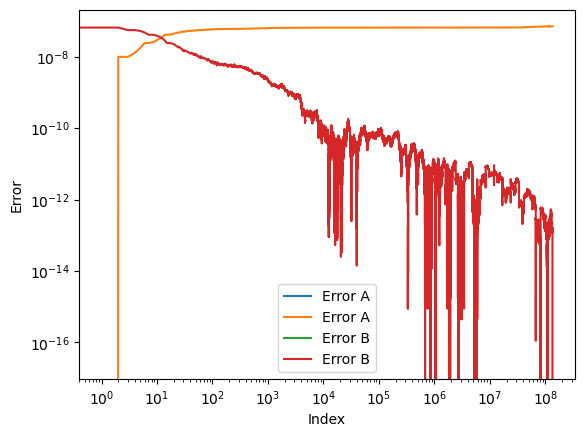

In [17]:
import matplotlib.pyplot as plt

x_values = np.arange(len(error_a))

plt.loglog(x_values, error_a, label='Error A')

plt.loglog(x_values, error_b, label='Error B')
plt.legend()

plt.xlabel('Index')
plt.ylabel('Error')

plt.show()



##### Task 2 (8 Points)

In [69]:
""" 
    topic: horner's method
    
    a)
    implement b_adisch(basis, zahl)

    that transform zahl into basis-adic number system representation

    for all basis >= 2

    b)
    implement hornerschema(basis, b_adische_zahl)

    that converts a b_adische_zahl with basis-adic representation into a decimal representation

    c)
    how do you have to modify b) so it works on polynomials
    
"""
####### a #######
def b_adisch(basis,zahl):
    if basis < 2 or basis > 9:
        raise ValueError("1 < basis < 10 ")
    representation = ""
    while zahl > 0:
        representation += str(zahl % basis)
        zahl = int(zahl/basis)
    return representation[::-1]
####### b #######
def hornerschema(basis,b_adische_zahl:str):
    z = 0
    for z_i in b_adische_zahl:
        z = z * basis + int(z_i)
    return z
####### c #######
def hornerschema(basis, koeffizienten:list, b_adische_zahl:str):
    z = 0
    for z_i in b_adische_zahl:
        z = z * basis + int(z_i)
    ergebnis = 0
    for koeff in koeffizienten:
        ergebnis = ergebnis * z + koeff
    return ergebnis

##### Task 3 (5 Points)

In [11]:
""" 
    topic: machine precision 

    a) 
    implement geteps()
        set y = 1 
        and halve y until 1 + y = 1

    b)
    implement getmax()
        set y = 1
        and double y until y < +INF

    compare it with IEEE 754

    why don't you receive the highest possible number?

    c) 
    implement getmin()
        set y = 1
        and halve y until y = 0 

    what do you notice ? 
"""
####### a #######
def geteps():
    y = 1.0
    while 1 + y != 1:
        y /= 2
    return y

####### b #######
def getmax():
    y = 1.0
    while y < float("inf"):
        y *= 2.0
    return y

####### c #######
def getmin():
    y = 1.0
    while y != 0:
        y /= 2
    return y

inf